In [1]:
#import networkx as nx
#import matplotlib.pyplot as plt
from tqdm import tqdm
from generate_asymp_3_reg_graph import create_random_3_reg_graph
from decycle_3_reg_graph import decycling_algorithm_3_reg_graph

n = 52
max_label = []
num_leafs = []
for _ in tqdm(range(10000)):
    G = create_random_3_reg_graph(n)
    H = decycling_algorithm_3_reg_graph(G)
    
    max_label.append(max(H.nodes()))
    num_leafs.append(len([node for node in H.nodes() if H.degree(node) == 1]))

    #if n-1 in H.nodes():
    #    print("Found", n-1, "in the nodes of the graph")
    #    nx.draw(H, with_labels=True)
    #    plt.show()
    #    break

max_label_avg = sum(max_label) / len(max_label)
num_leafs_avg = sum(num_leafs) / len(num_leafs)

print("Maximal Label Average:", max_label_avg)
print("Maximal Label:", max(max_label))
print("Average Number of Leafs:", num_leafs_avg)
print("Maximal number of Leafs:", max(num_leafs))
print("Minimal number of Leafs:", min(num_leafs))

100%|██████████| 10000/10000 [00:42<00:00, 236.70it/s]

Maximal Label Average: 49.0177
Maximal Label: 51
Average Number of Leafs: 11.1219
Maximal number of Leafs: 16
Minimal number of Leafs: 6


Graph with 70 nodes and 105 edges
Graph with 52 nodes and 51 edges
Generating efficient set of color configurations


100%|██████████| 387420489/387420489 [03:32<00:00, 1819716.12it/s]


Number of workers not specified. Using all 16 available CPU cores.
Starting parallelized computing of (closest) Sudoku coloring


59008544it [1:01:28, 15996.48it/s]                              


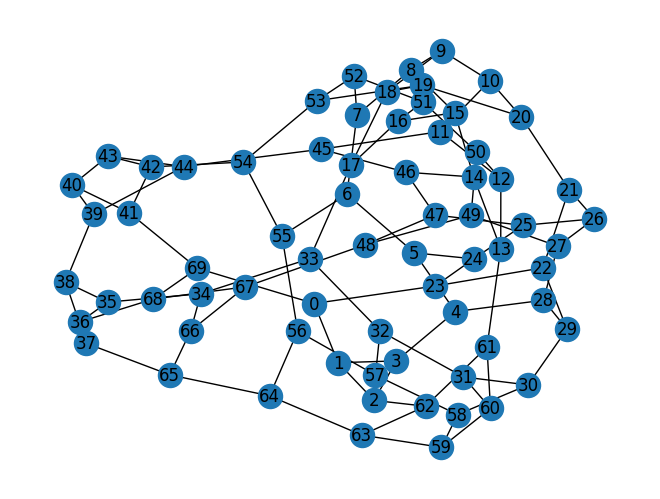

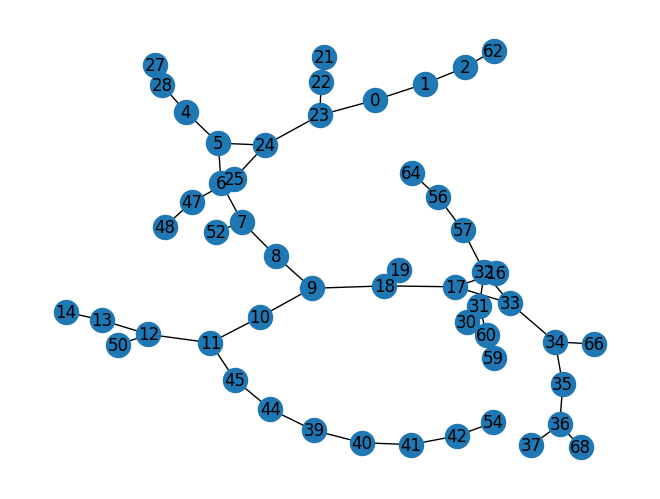

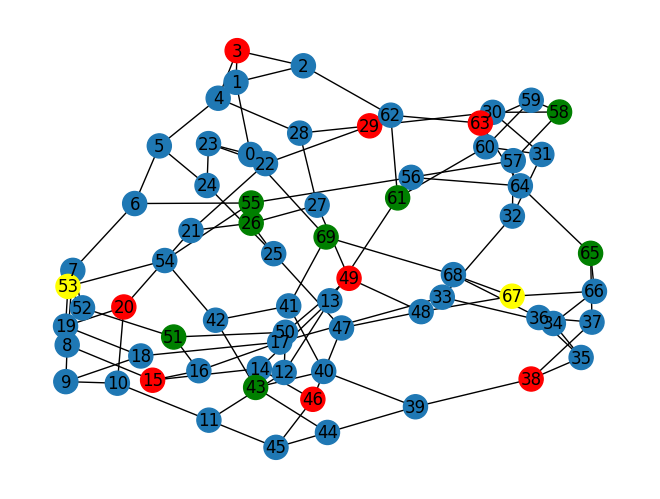

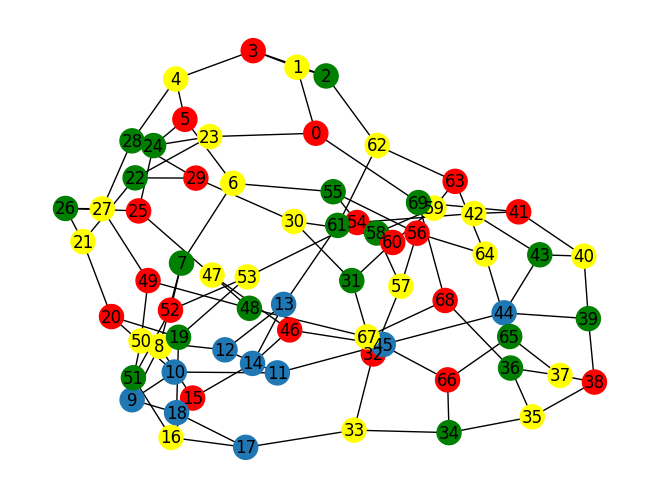

{3: 0, 15: 0, 20: 0, 26: 1, 29: 0, 38: 0, 43: 1, 46: 0, 49: 0, 51: 1, 53: 2, 55: 1, 58: 1, 61: 1, 63: 0, 65: 1, 67: 2, 69: 1, 16: 2, 19: 1, 21: 2, 22: 1, 27: 2, 28: 1, 4: 2, 30: 2, 37: 2, 48: 1, 47: 2, 25: 0, 50: 2, 52: 0, 54: 0, 42: 2, 41: 0, 40: 2, 39: 1, 59: 2, 60: 0, 31: 1, 62: 2, 2: 1, 1: 2, 0: 0, 23: 2, 24: 1, 5: 0, 6: 2, 7: 1, 8: 2, 64: 2, 56: 0, 57: 2, 32: 0, 66: 0, 68: 0, 36: 1, 35: 2, 34: 1, 33: 2} 10


In [1]:
import networkx as nx
from generate_asymp_3_reg_graph import create_random_3_reg_graph
from decycle_3_reg_graph import decycling_algorithm_3_reg_graph
from find_sudoku_coloring_3_reg_graph import find_coloring_3_reg_graph
from parallel_find_sudoku_coloring_3_reg_graph import parallel_sudoku_coloring
from matplotlib import pyplot as plt

n = 70

# Generate a random 3-regular graph with n vertices by assuming that there is a hamilton cycle 1,2,3,...,n and randomly matching the nodes afterwards
G = create_random_3_reg_graph(n)
print(G)

# Decycle the graph G using Wormald's algorithm. The graph H is the resulting tree.
H = decycling_algorithm_3_reg_graph(G)
print(H)

#best_coloring, best_sudoku_coloring, best_coloring_uncolored = find_coloring_3_reg_graph(G,H)
best_coloring, best_sudoku_coloring, best_coloring_uncolored = parallel_sudoku_coloring(G,H)
node_colors = []
for node in G.nodes():
    if node not in best_coloring:
        node_colors.append('#1f78b4')
    else:
        if best_coloring[node] == 0:
            node_colors.append('red')
        elif best_coloring[node] == 1:
            node_colors.append('green')
        else:
            node_colors.append('yellow')
        #node_colors.append(best_coloring[node])

sudoku_colors = []
for node in G.nodes():
    if node not in best_sudoku_coloring:
        sudoku_colors.append('#1f78b4')
    else:
        #sudoku_colors.append(best_sudoku_coloring[node])
        if best_sudoku_coloring[node] == 0:
            sudoku_colors.append('red')
        elif best_sudoku_coloring[node] == 1:
            sudoku_colors.append('green')
        else:
            sudoku_colors.append('yellow')

nx.draw(G, with_labels=True)
plt.show()

nx.draw(H, with_labels=True)
plt.show()

nx.draw(G, with_labels=True, node_color=sudoku_colors)
plt.show()

nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

print(best_coloring, best_coloring_uncolored)

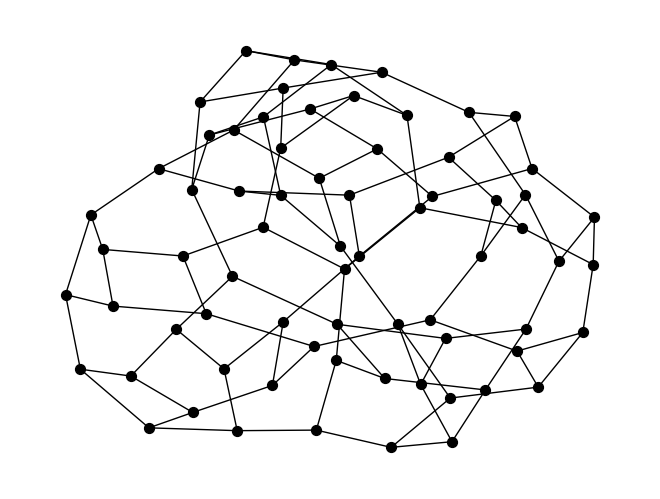

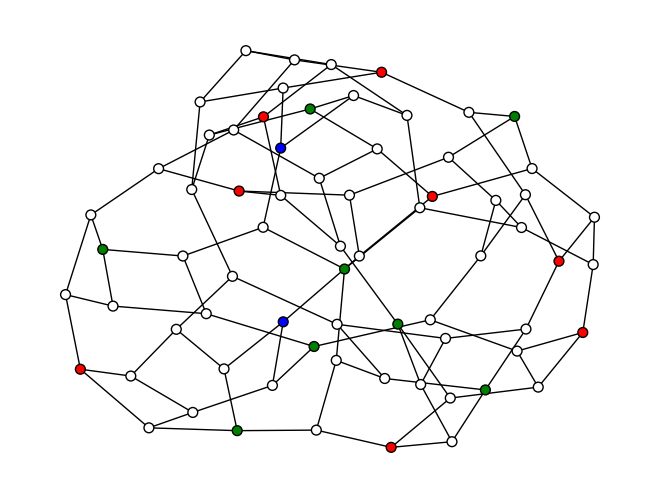

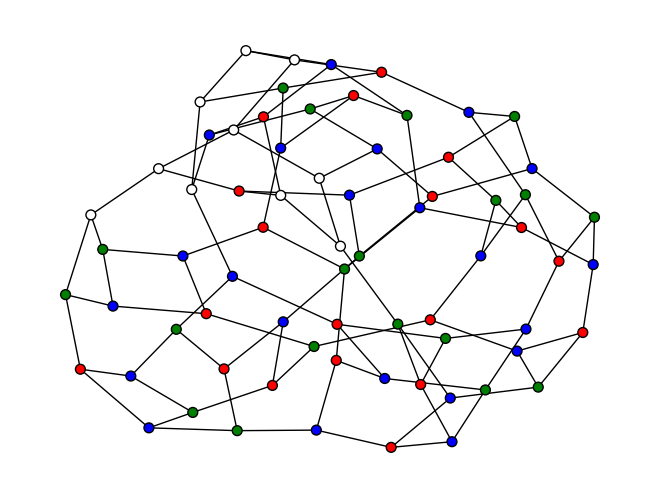

In [2]:
node_colors_adj = []
for node in G.nodes():
    if node not in best_coloring:
        node_colors_adj.append('white')
    else:
        if best_coloring[node] == 0:
            node_colors_adj.append('red')
        elif best_coloring[node] == 1:
            node_colors_adj.append('green')
        else:
            node_colors_adj.append('blue')
        #node_colors_adj.append(best_coloring[node])

sudoku_colors_adj = []
for node in G.nodes():
    if node not in best_sudoku_coloring:
        sudoku_colors_adj.append('white')
    else:
        #sudoku_colors_adj.append(best_sudoku_coloring[node])
        if best_sudoku_coloring[node] == 0:
            sudoku_colors_adj.append('red')
        elif best_sudoku_coloring[node] == 1:
            sudoku_colors_adj.append('green')
        else:
            sudoku_colors_adj.append('blue')

# Compute a layout
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, with_labels=False, node_size=50, edgecolors='black', node_color='black')
plt.show()

nx.draw(G, pos, with_labels=False, node_color=sudoku_colors_adj, node_size=50, edgecolors='black')
plt.savefig("sudoku_set.pdf")
plt.show()

nx.draw(G, pos, with_labels=False, node_color=node_colors_adj, node_size=50, edgecolors='black')
plt.savefig("sudoku_set_extended.pdf")
plt.show()